In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

import sys
sys.path.append('D:/thesis/src')
from two_level_clustering.Monitor import Monitor
from two_level_clustering.Utils import RectangularLattice, generate_mixture
from two_level_clustering.SOCEM import SOCEM

mpl.rcParams['figure.dpi'] = 300

### Demonstation of boundary effect

In [2]:
np.random.seed(42)

In [3]:
n_samples = 500

# Define the parameters for the 2D Gaussian finite mixture
means = np.array([[-1, -2], [2, -5], [3.2, 6.2], [9.7, 4.7], [10, -3]])

# Define covariances for each component
covariances = np.array([[[1, 0], [0, 1]],  
                        [[1, 0.5], 
                         [0.5, 1]],  
                        [[1.1, 0.3], 
                         [0.3, 1]],
                        [[1.2, -0.9], [-0.9, 1.5]],
                        [[1, -0.9], [-0.9, 1]]])

probabilities = np.array([0.2, 0.15, 0.35, 0.2, 0.1])

In [4]:
data, labels = generate_mixture(means, covariances, probabilities, n_samples)

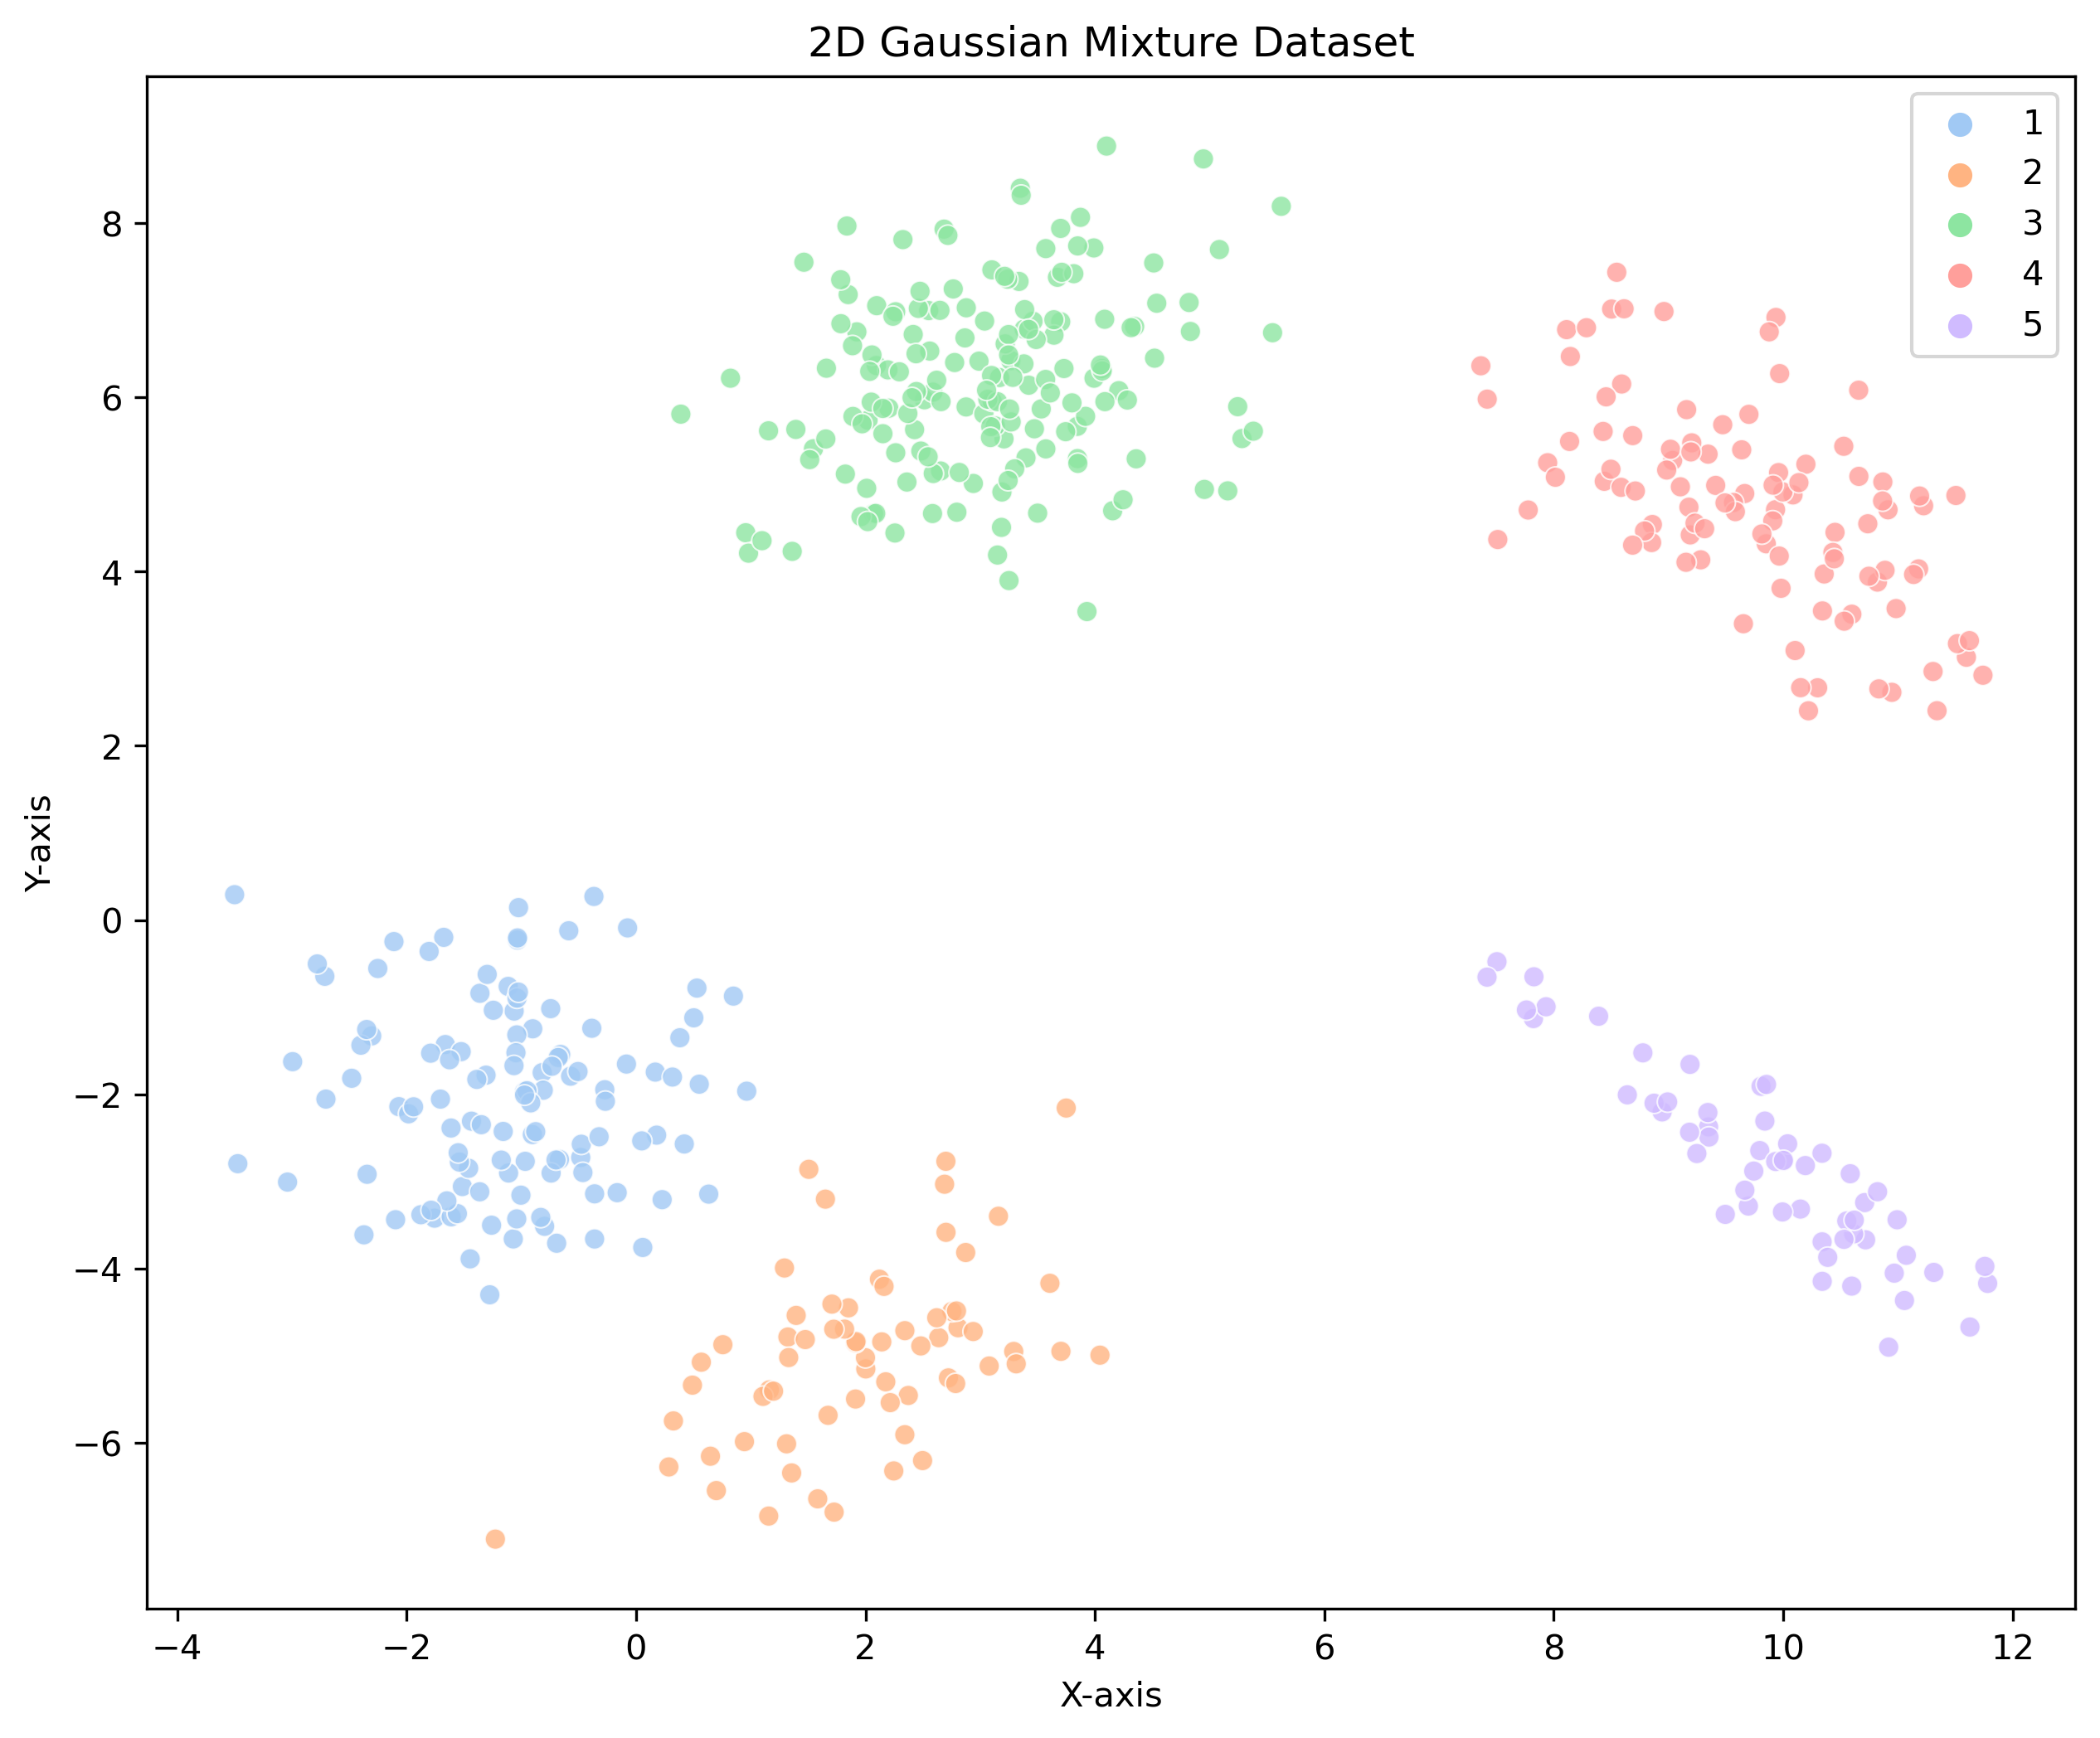

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

# Generate data points from the 2D Gaussian mixture

custom_palette = sns.color_palette("pastel", len(np.unique(labels)))  # Use Seaborn's "husl" palette for n colors

# Visualize the generated data
sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.8, hue=labels + 1, ax=ax, palette=custom_palette)

# for mean, color in zip(means, custom_palette):
#     ax.plot(mean[0], mean[1], color=color, markersize=14, marker='*')


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Gaussian Mixture Dataset');

In [6]:
k = 4
lattice = RectangularLattice((k, k))
som = SOCEM(lattice, sigma_start = 0.8, sigma_step = 0.02, max_iter=30, tol=1e-6, betta=1.2, cov_type='full', random_state=3)

In [7]:
monitor = Monitor(som)
som.fit(data, monitor)

In [8]:
monitor

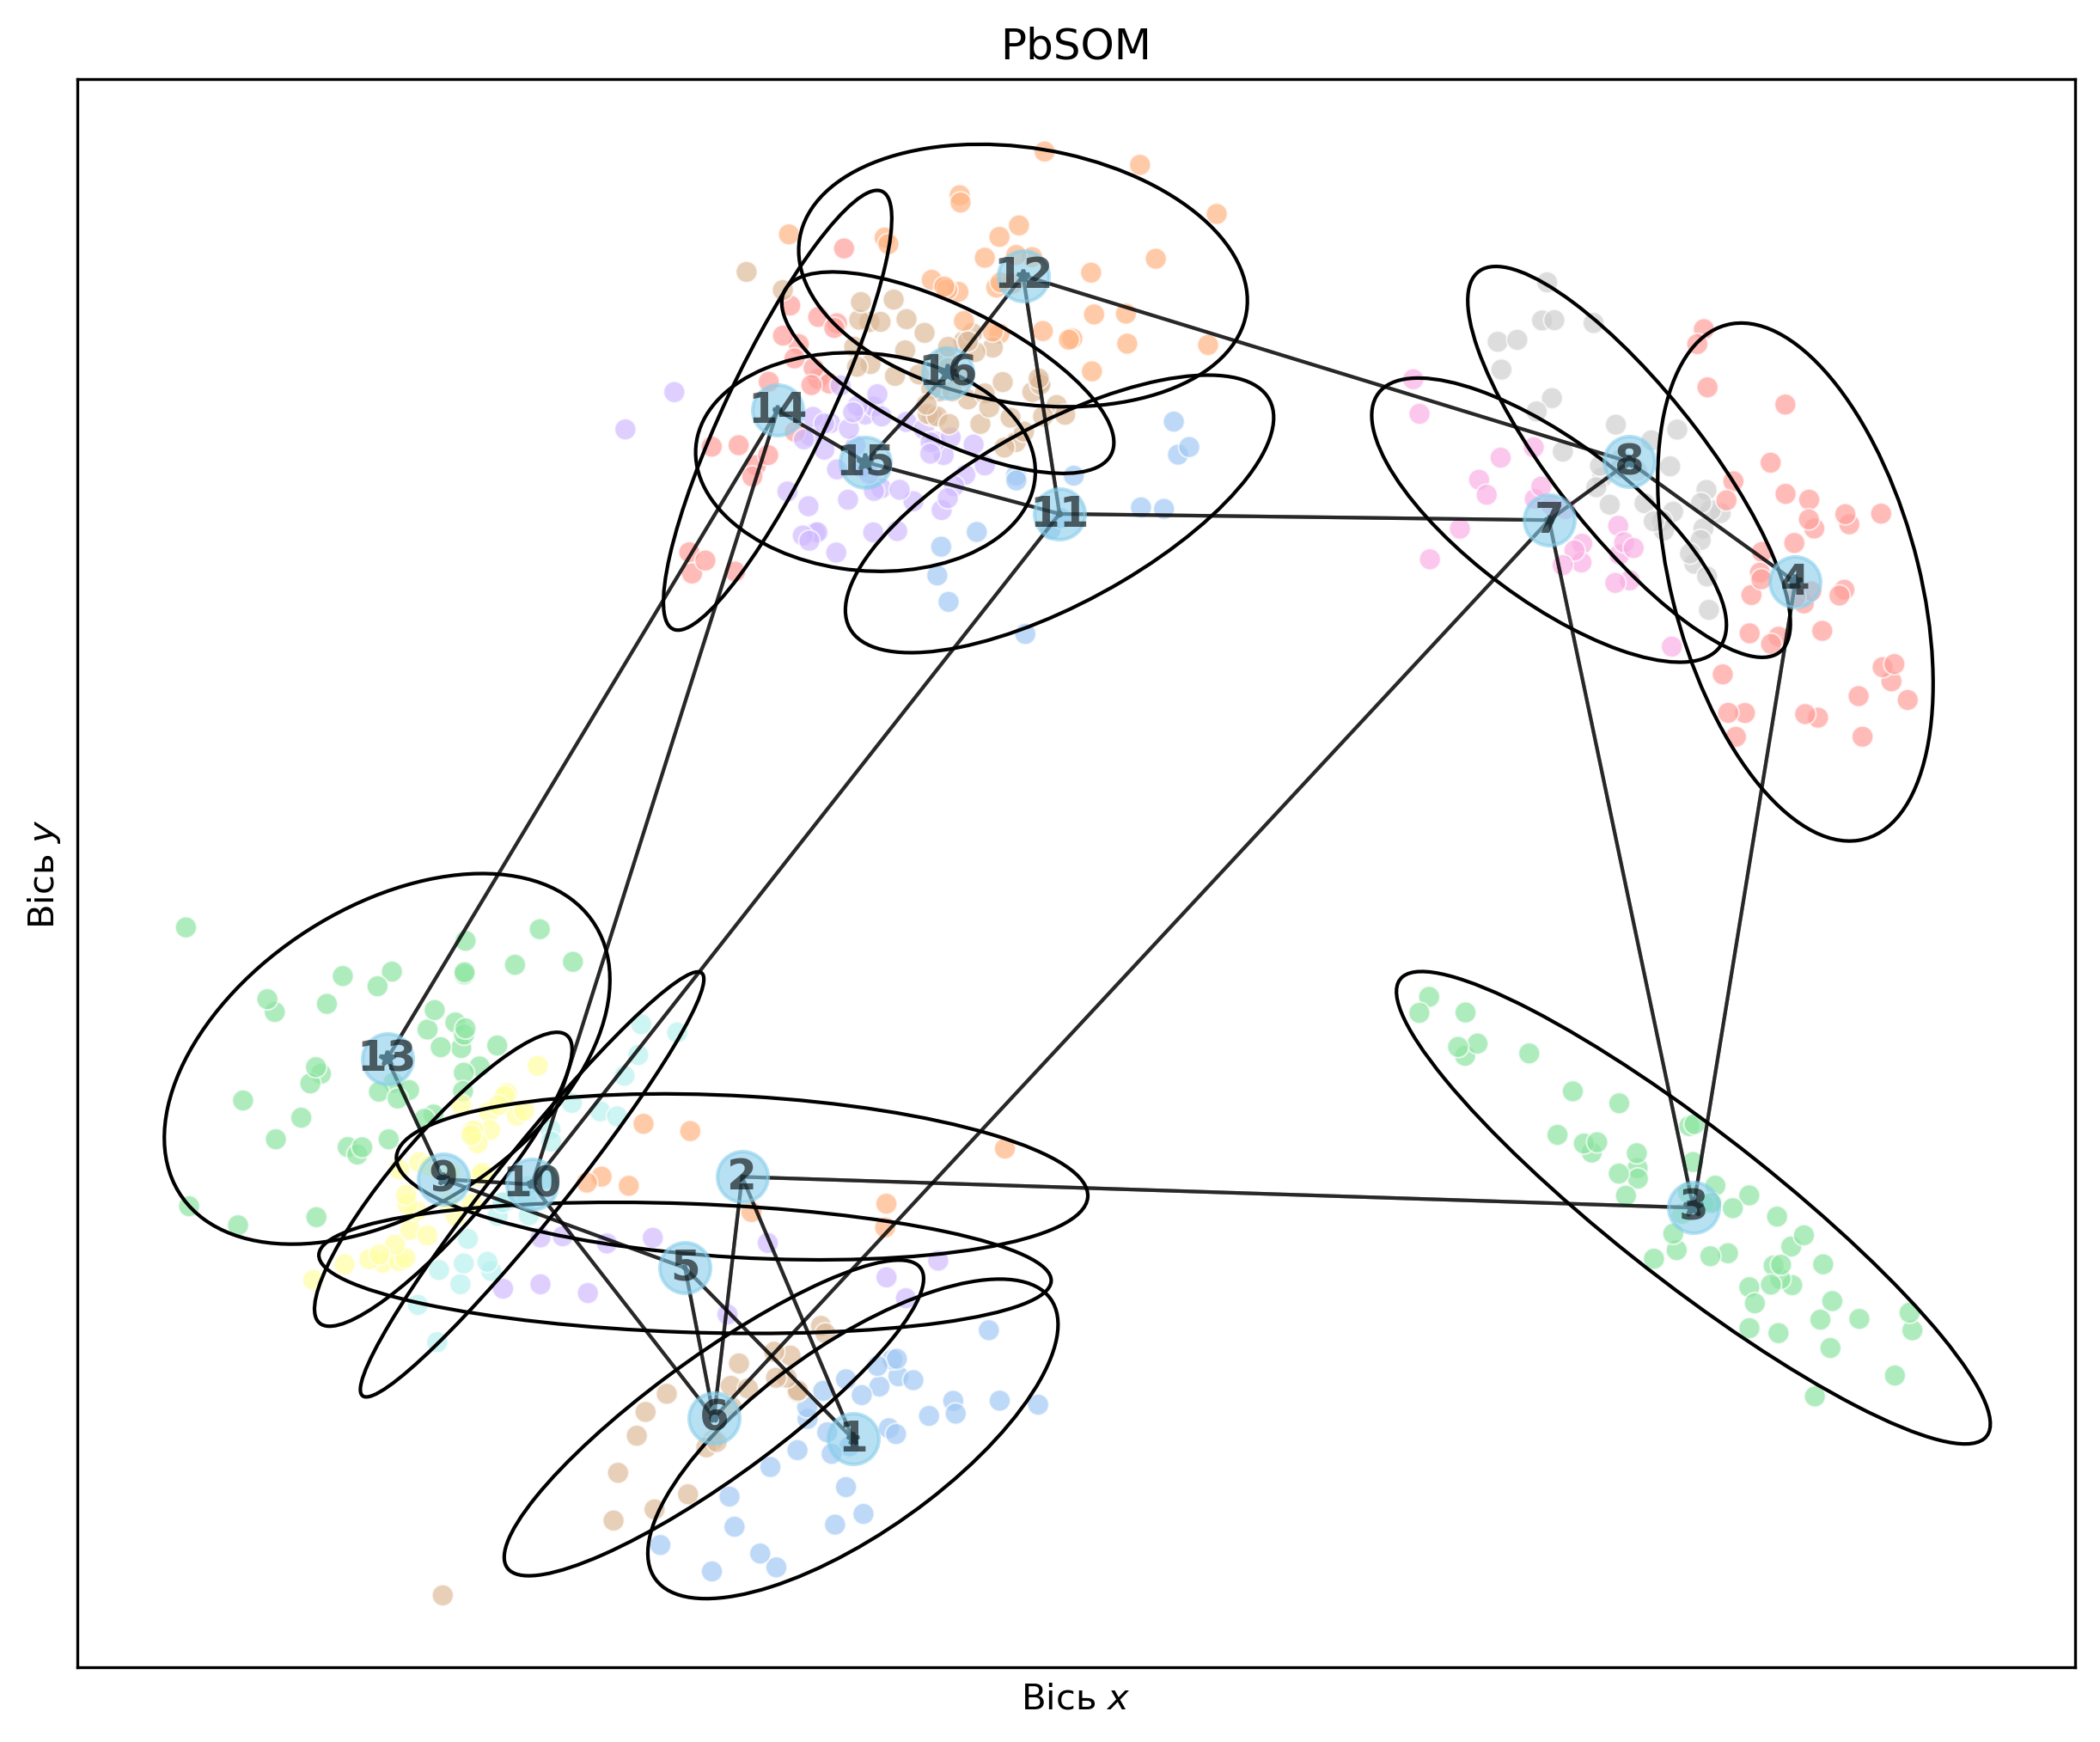

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

monitor.draw(ax, 'PbSOM', monitor.idx_-1, data, None, "pastel", shift_enumeration=True)
ax.set_xlabel('Вісь $x$')
ax.set_ylabel('Вісь $y$')
ax.get_legend().remove()
plt.savefig('../Images/clustering_res5.png', dpi=300)